___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

### Some Reminders on Exploratory data analysis (EDA)

Exploratory data analysis (EDA) is an especially important activity in the routine of a data analyst or scientist. It enables an in depth understanding of the dataset, define or discard hypotheses and create predictive models on a solid basis. It uses data manipulation techniques and several statistical tools to describe and understand the relationship between variables and how these can impact business. By means of EDA, we can obtain meaningful insights that can impact analysis under the following questions (If a checklist is good enough for pilots to use every flight, it’s good enough for data scientists to use with every dataset).
1. What question are you trying to solve (or prove wrong)?
2. What kind of data do you have?
3. What’s missing from the data?
4. Where are the outliers?
5. How can you add, change or remove features to get more out of your data?

**``Exploratory data analysis (EDA)``** is often an **iterative brainstorming process** where you pose a question, review the data, and develop further questions to investigate before beginning model development work. The image below shows how the brainstorming phase is connected with that of understanding the variables and how this in turn is connected again with the brainstorming phase.<br>

<img src=https://i.ibb.co/k0MC950/EDA-Process.png width="300" height="100">

[Image Credit: Andrew D.](https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee)

**``In this context, the project consists of 3 parts in general:``**
* **The first part** is related to 'Data Cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, and Dropping useless columns.
* **The second part** is related to 'Filling Data', in other words 'Imputation'. It deals with Missing Values. Categorical to numeric transformation is done as well.
* **The third part** is related to 'Handling Outliers of Data' via Visualization libraries. So, some insights will be extracted.

**``NOTE:``**  However, you are free to create your own style. You do NOT have to stick to the steps above. We, the DA & DV instructors, recommend you study each part separately to create a source notebook for each part title for your further studies. 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)
sns.set_style("whitegrid")

pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option(‘display.max_rows’, None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

In [4]:
df = pd.read_csv("filled_autoscout.csv")

In [5]:
df.head(2).T

,0,1
body_type,Sedans,Sedans
price_€,15770.000,14500.000
vat,VAT deductible,Price negotiable
km,56013.000,80000.000
hp_kW,66.000,141.000
type,Used,Used
previous_owners,2.000,1.000
warranty,12.000,12.000
make,Audi,Audi
model,A1,A1


# PART- 3 `( Handling With Outliers )`

In [15]:
def detect_outlier(col):
    print('column name : ',col)
    print("--"*20)
    Q1 = df[col].quantile(0.25)
    print("Q1 : ", Q1)
    Q3 = df[col].quantile(0.75)
    print("Q3 : ", Q3)
    IQR = Q3 - Q1
    print("IQR : ", IQR )
    lower_lim = Q1 - 1.5*IQR
    print("lower limit : ", lower_lim)
    print("mean        : ", round(df[col].mean(), 2))
    upper_lim = Q3 +1.5*IQR
    print("upper limit : ", upper_lim)
    cnt_of_lower = (df[col] < lower_lim).sum()
    print("count of lower values : ", cnt_of_lower)
    cnt_of_upper = (df[col] > upper_lim).sum()
    print("count of upper values : ", cnt_of_upper)
    print(" ")
    print("the smallest 10 values :\n", df[col].sort_values().head(10))
    print(" ")
    print("the biggest 10 values :\n", df[col].sort_values(ascending = False).head(10))
    
    print("\n\n")

In [16]:
for i in df.select_dtypes(exclude="O").columns:
    detect_outlier(i)

column name :  price_€
----------------------------------------
Q1 :  12850.0
Q3 :  21900.0
IQR :  9050.0
lower limit :  -725.0
mean        :  18019.9
upper limit :  35475.0
count of lower values :  0
count of upper values :  479
 
the smallest 10 values :
 8594      13.000
8828     120.000
6066     255.000
8829     331.000
8827    4950.000
8825    4990.000
8826    5250.000
8824    5300.000
13770   5445.000
8823    5450.000
Name: price_€, dtype: float64
 
the biggest 10 values :
 3648    74600.000
15826   68320.000
3649    67600.000
3587    64900.000
15828   64332.000
15831   64298.000
3595    63900.000
15833   63477.000
3590    62900.000
3594    58990.000
Name: price_€, dtype: float64



column name :  km
----------------------------------------
Q1 :  2000.0
Q3 :  46898.5
IQR :  44898.5
lower limit :  -65347.75
mean        :  31964.85
upper limit :  114246.25
count of lower values :  0
count of upper values :  691
 
the smallest 10 values :
 14518   0.000
9892    0.000
2496    0.000
9

# **1.price_€**

In [17]:
detect_outlier("price_€")

column name :  price_€
----------------------------------------
Q1 :  12850.0
Q3 :  21900.0
IQR :  9050.0
lower limit :  -725.0
mean        :  18019.9
upper limit :  35475.0
count of lower values :  0
count of upper values :  479
 
the smallest 10 values :
 8594      13.000
8828     120.000
6066     255.000
8829     331.000
8827    4950.000
8825    4990.000
8826    5250.000
8824    5300.000
13770   5445.000
8823    5450.000
Name: price_€, dtype: float64
 
the biggest 10 values :
 3648    74600.000
15826   68320.000
3649    67600.000
3587    64900.000
15828   64332.000
15831   64298.000
3595    63900.000
15833   63477.000
3590    62900.000
3594    58990.000
Name: price_€, dtype: float64





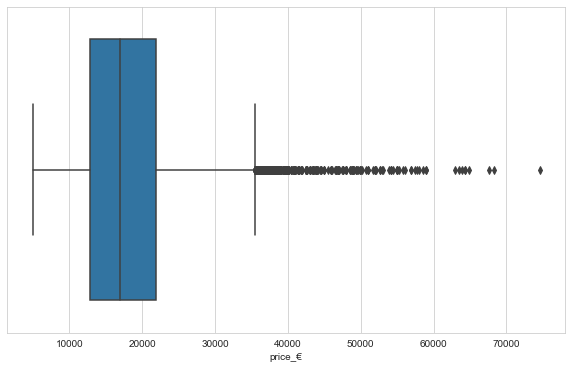

In [28]:
sns.boxplot(x="price_€", data=df);

In [ ]:
# Lower values 0 çıkmasına rağmen ilk 4 değer çok küçük görünüyor. 
# Bu değerlerin outlier olduğunu tespit ettik.
# Upper values 479 çıktı fakat price_€ column kendi içinde değerlendirildiğinde bu fiyatlara outlier demek mantıklı olmayacaktır,
# Araçların özelliklerine göre fiyatlar bu seviyelere kadar artabilir.

In [19]:
df.iloc[[8594, 8828, 6066, 8829]]

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,consumption_city,consumption_country,age
8594,Sedans,13.000,VAT deductible,123.000,66.000,Used,1.000,12.000,Opel,Corsa,Gold,Metallic,Cloth,3.000,5.000,Manual,1398.000,4.000,1141.000,front,Benzine,128.000,Euro 6d-TEMP,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive headlights,Central door lock with...",5.000,Unknown,5.600,6.800,4.900,1.000
8828,Compact,120.000,VAT deductible,12.000,66.000,New,0.000,24.000,Opel,Corsa,Grey,Metallic,Cloth,5.000,5.000,Manual,999.000,3.000,1099.000,front,Benzine,107.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","Digital radio,On-board computer,Radio","Alloy wheels,Sport suspension","Central door lock,Daytime running lights,Drive...",6.000,Netherlands,4.600,5.600,4.100,0.000
6066,Station wagon,255.000,VAT deductible,5563.000,100.000,Used,1.000,12.000,Opel,Astra,Gold,Metallic,Cloth,5.000,5.000,Manual,1598.000,4.000,1403.000,front,Diesel,101.000,Euro 6,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,Hands-free equipment,On-board comput...",Roof rack,"ABS,Central door lock with remote control,Dayt...",6.000,Unknown,3.800,4.500,3.400,1.000
8829,Other,331.000,VAT deductible,10.000,66.000,New,0.000,24.000,Opel,Corsa,White,Metallic,Cloth,5.000,5.000,Manual,999.000,3.000,1163.000,front,Benzine,128.000,Euro 6d-TEMP,"Air conditioning,Armrest,Automatic climate con...","Hands-free equipment,On-board computer,Radio","Alloy wheels,Sport package","ABS,Central door lock,Driver-side airbag,Elect...",6.000,Netherlands,6.650,8.200,5.700,0.000


In [ ]:
# df.loc[df["price_€"] < 400,  ["price_€"]] = np.nan 
# it's the same code below

In [23]:
df["price_€"] = df["price_€"].apply(lambda x: np.nan if x < 400 else x)

In [24]:
df["price_€"] = df.groupby(["make", "model", "body_type", "age"])["price_€"].apply(lambda x : x.fillna(round(x.mean(),2))

In [25]:
df.iloc[[8594, 8828, 6066, 8829]]

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,consumption_city,consumption_country,age
8594,Sedans,10853.414,VAT deductible,123.000,66.000,Used,1.000,12.000,Opel,Corsa,Gold,Metallic,Cloth,3.000,5.000,Manual,1398.000,4.000,1141.000,front,Benzine,128.000,Euro 6d-TEMP,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive headlights,Central door lock with...",5.000,Unknown,5.600,6.800,4.900,1.000
8828,Compact,13816.196,VAT deductible,12.000,66.000,New,0.000,24.000,Opel,Corsa,Grey,Metallic,Cloth,5.000,5.000,Manual,999.000,3.000,1099.000,front,Benzine,107.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","Digital radio,On-board computer,Radio","Alloy wheels,Sport suspension","Central door lock,Daytime running lights,Drive...",6.000,Netherlands,4.600,5.600,4.100,0.000
6066,Station wagon,16932.864,VAT deductible,5563.000,100.000,Used,1.000,12.000,Opel,Astra,Gold,Metallic,Cloth,5.000,5.000,Manual,1598.000,4.000,1403.000,front,Diesel,101.000,Euro 6,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,Hands-free equipment,On-board comput...",Roof rack,"ABS,Central door lock with remote control,Dayt...",6.000,Unknown,3.800,4.500,3.400,1.000
8829,Other,12310.357,VAT deductible,10.000,66.000,New,0.000,24.000,Opel,Corsa,White,Metallic,Cloth,5.000,5.000,Manual,999.000,3.000,1163.000,front,Benzine,128.000,Euro 6d-TEMP,"Air conditioning,Armrest,Automatic climate con...","Hands-free equipment,On-board computer,Radio","Alloy wheels,Sport package","ABS,Central door lock,Driver-side airbag,Elect...",6.000,Netherlands,6.650,8.200,5.700,0.000


# **2.km**

In [21]:
detect_outlier("km")

column name :  km
----------------------------------------
Q1 :  2000.0
Q3 :  46898.5
IQR :  44898.5
lower limit :  -65347.75
mean        :  31964.85
upper limit :  114246.25
count of lower values :  0
count of upper values :  691
 
the smallest 10 values :
 14518   0.000
9892    0.000
2496    0.000
9882    0.000
15668   0.000
5553    0.000
12512   0.000
5672    0.000
9929    0.000
7828    0.000
Name: km, dtype: float64
 
the biggest 10 values :
 9279    317000.000
3003    291800.000
5712    260000.000
6224    248000.000
15277   240000.000
10804   232000.000
6380    231879.000
6062    230928.000
6399    229500.000
10495   222346.000
Name: km, dtype: float64





In [ ]:
# nothing done.

# **3.hp_kW**

In [35]:
detect_outlier("hp_kW")

column name :  hp_kW
----------------------------------------
Q1 :  66.0
Q3 :  101.0
IQR :  35.0
lower limit :  13.5
mean        :  88.37
upper limit :  153.5
count of lower values :  22
count of upper values :  406
 
the smallest 10 values :
 6034   1.000
7019   1.000
7014   1.000
9285   1.000
6005   1.000
9287   1.000
9288   1.000
7018   1.000
9289   1.000
9290   1.000
Name: hp_kW, dtype: float64
 
the biggest 10 values :
 3595   294.000
3606   294.000
3587   294.000
3590   294.000
3592   294.000
3593   294.000
3596   294.000
3598   294.000
3599   294.000
3600   294.000
Name: hp_kW, dtype: float64





In [34]:
df.loc[df["hp_kW"].sort_values(ascending=True).head(50).index]

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,consumption_city,consumption_country,age
6034,Station wagon,11600.000,VAT deductible,76010.000,1.000,Used,1.000,12.000,Opel,Astra,Silver,Metallic,Cloth,5.000,5.000,Automatic,998.000,4.000,1393.000,front,Benzine,125.000,Euro 6,"Air conditioning,Electrical side mirrors,Leath...","Bluetooth,On-board computer,Radio,USB","Catalytic Converter,Roof rack,Touch screen","Alarm system,Central door lock,Driver-side air...",6.000,Unknown,6.440,8.300,5.300,2.000
7019,Sedans,11700.000,VAT deductible,69035.000,1.000,Used,1.000,12.000,Opel,Astra,Black,Metallic,Other,5.000,5.000,Manual,1364.000,4.000,1308.000,front,Benzine,125.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","CD player,Radio",Alloy wheels,"Driver-side airbag,Electronic stability contro...",6.000,Unknown,5.378,7.300,4.200,2.000
7014,Sedans,11700.000,VAT deductible,79993.000,1.000,Used,1.000,12.000,Opel,Astra,Silver,Metallic,Other,5.000,5.000,Manual,1364.000,4.000,1308.000,front,Benzine,125.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","CD player,Radio",Alloy wheels,"Driver-side airbag,Electronic stability contro...",6.000,Unknown,5.378,7.300,4.200,2.000
9285,Sedans,8300.000,Price negotiable,58912.000,1.000,Used,1.000,12.000,Opel,Corsa,Black,Metallic,Cloth,5.000,5.000,Manual,1229.000,4.000,1163.000,front,Benzine,128.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,On-board computer,Radio,USB",Alloy wheels,"Alarm system,Central door lock,Driver-side air...",5.000,Unknown,5.398,6.700,4.600,2.000
6005,Station wagon,11600.000,VAT deductible,73860.000,1.000,Used,1.000,12.000,Opel,Astra,Black,Metallic,Cloth,5.000,5.000,Automatic,998.000,4.000,1393.000,front,Benzine,125.000,Euro 6,"Air conditioning,Electrical side mirrors,Leath...","Bluetooth,On-board computer,Radio,USB",Roof rack,"Alarm system,Central door lock,Driver-side air...",6.000,Unknown,6.440,8.300,5.300,2.000
9287,Sedans,8300.000,Price negotiable,53522.000,1.000,Used,1.000,12.000,Opel,Corsa,Silver,Metallic,Cloth,5.000,5.000,Manual,1229.000,4.000,1163.000,front,Benzine,128.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,On-board computer,Radio,USB",Alloy wheels,"Alarm system,Central door lock,Driver-side air...",5.000,Unknown,5.398,6.700,4.600,2.000
9288,Sedans,8300.000,Price negotiable,60386.000,1.000,Used,1.000,12.000,Opel,Corsa,Silver,Metallic,Cloth,5.000,5.000,Manual,1229.000,4.000,1163.000,front,Benzine,128.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,On-board computer,Radio,USB",Alloy wheels,"Alarm system,Central door lock,Driver-side air...",5.000,Unknown,5.398,6.700,4.600,2.000
7018,Sedans,11700.000,VAT deductible,77272.000,1.000,Used,1.000,12.000,Opel,Astra,Black,Metallic,Other,5.000,5.000,Manual,1364.000,4.000,1308.000,front,Benzine,125.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","CD player,Radio",Alloy wheels,"Driver-side airbag,Electronic stability contro...",6.000,Unknown,5.378,7.300,4.200,2.000
9289,Sedans,8300.000,Price negotiable,59217.000,1.000,Used,1.000,12.000,Opel,Corsa,Silver,Metallic,Cloth,5.000,5.000,Manual,1229.000,4.000,1163.000,front,Benzine,128.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,On-board computer,Radio,USB",Alloy wheels,"Alarm system,Central door lock,Driver-side air...",5.000,Unknown,5.398,6.700,4.600,2.000
9290,Sedans,8300.000,Price negotiable,51318.000,1.000,Used,1.000,12.000,Opel,Corsa,Silver,Metallic,Cloth,5.000,5.000,Manual,1229.000,4.000,1163.000,front,Benzine,128.000,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,On-board computer,Radi

In [33]:
df.loc[df["hp_kW"].sort_values(ascending=False).head(50).index]

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,consumption_city,consumption_country,age
3595,Station wagon,63900.000,VAT deductible,10.000,294.000,Used,1.000,24.000,Audi,A3,Black,Metallic,Part leather,5.000,5.000,Semi-automatic,2480.000,5.000,1585.000,front,Benzine,189.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Shift paddles,Ski bag,Sport packa...","ABS,Adaptive Cruise Control,Adaptive headlight...",7.000,Italy,8.300,11.300,6.600,0.000
3606,Sedans,49900.000,VAT deductible,17234.000,294.000,Used,1.000,12.000,Audi,A3,Black,Metallic,Part leather,5.000,5.000,Semi-automatic,2480.000,5.000,1585.000,front,Benzine,189.000,Euro 6,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.000,Unknown,8.300,11.300,6.600,1.000
3587,Sedans,64900.000,VAT deductible,35000.000,294.000,Used,1.000,12.000,Audi,A3,Grey,Metallic,Full leather,5.000,5.000,Semi-automatic,2480.000,5.000,1585.000,front,Benzine,189.000,Euro 6,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.000,Unknown,8.300,11.300,6.600,1.000
3590,Sedans,62900.000,VAT deductible,700.000,294.000,Used,1.000,24.000,Audi,A3,Grey,Metallic,Part leather,5.000,5.000,Semi-automatic,2480.000,5.000,1585.000,front,Benzine,194.000,Euro 6d-TEMP,"Air conditioning,Seat ventilation,Split rear s...","Bluetooth,Radio",Alloy wheels,"ABS,Adaptive Cruise Control,Alarm system,Centr...",7.000,Unknown,8.300,11.300,6.600,0.000
3592,Sedans,56900.000,VAT deductible,5200.000,294.000,Used,1.000,12.000,Audi,A3,Grey,Metallic,Full leather,5.000,5.000,Semi-automatic,2480.000,5.000,1585.000,4WD,Benzine,189.000,Euro 6,"Air conditioning,Air suspension,Armrest,Automa...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Shift paddles,Sport package,Sport...","ABS,Adaptive Cruise Control,Adaptive headlight...",7.000,Italy,8.300,11.300,6.600,1.000
3593,Sedans,58500.000,VAT deductible,10000.000,294.000,Used,1.000,12.000,Audi,A3,White,Metallic,Full leather,5.000,5.000,Semi-automatic,2480.000,5.000,1585.000,front,Benzine,189.000,Euro 6,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.000,Unknown,8.300,11.300,6.600,1.000
3596,Sedans,57400.000,Price negotiable,63000.000,294.000,Used,1.000,12.000,Audi,A3,Blue,Metallic,Full leather,5.000,5.000,Semi-automatic,2480.000,5.000,1585.000,4WD,Benzine,189.000,Euro 6,"Air conditioning,Air suspension,Armrest,Automa...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Sport suspension,Tune...","ABS,Adaptive Cruise Control,Adaptive headlight...",7.000,Unknown,8.300,11.300,6.600,1.000
3598,Sedans,55000.000,VAT deductible,24000.000,294.000,Used,1.000,12.000,Audi,A3,Black,Metallic,Full leather,5.000,5.000,Semi-automatic,2480.000,5.000,1585.000,front,Benzine,189.000,Euro 6,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.000,Unknown,8.300,11.300,6.600,2.000
3599,Sedans,55000.000,VAT deductible,30000.000,294.000,Used,1.000,12.000,Audi,A3,Grey,Metallic,Full leather,4.000,5.000,Semi-automatic,2480.000,5.000,1590.000,front,Benzine,188.000,Euro 6,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.000,Unknown,8.300,11.300,6.500,1.000
3600,Sedans,53000.000,VAT deductible,4000.000,294.000,Used,1.000,12.000,Audi,A3,Black,Metallic,Full leather,4.000,5.000,Semi-automatic,2480.000,5.000,1590.000,front,Benzine,188.000,Euro 6,"Air conditioning,Air 

In [29]:
df.groupby(["make", "model", "body_type"])["hp_kW"].mean()

make     model     body_type    
Audi     A1        Compact          77.078
                   Coupe            77.500
                   Other            80.385
                   Sedans           76.322
                   Station wagon    75.143
                   Van             147.000
         A2        Off-Road         85.000
         A3        Compact          89.945
                   Convertible     124.250
                   Coupe            82.000
                   Other            88.188
                   Sedans           90.077
                   Station wagon    90.681
Opel     Astra     Compact          87.849
                   Coupe           106.500
                   Off-Road        110.000
                   Other            86.403
                   Sedans           90.335
                   Station wagon    95.689
         Corsa     Compact          61.700
                   Coupe            59.462
                   Off-Road         68.667
                   Ot